In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from MLP import MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
Housing = pd.read_csv('dataset/HousingData.csv')

In [3]:
Housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


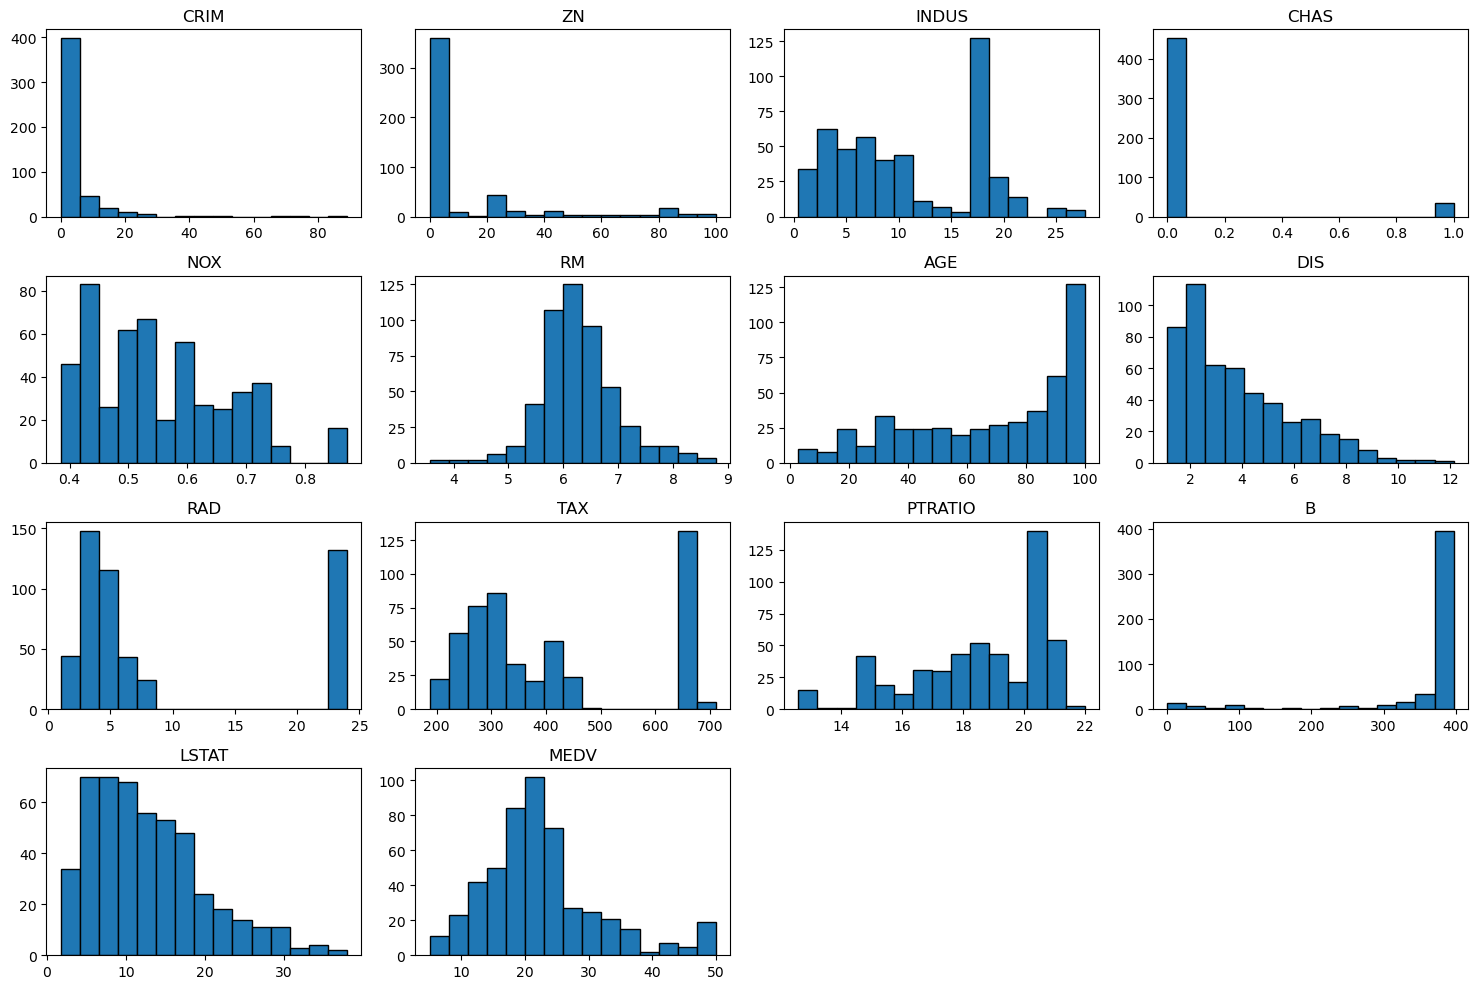

In [4]:
Housing.hist(bins=15, figsize=(15, 10), grid=False, edgecolor='black')

# Adjust layout to prevent overlapping
plt.tight_layout()
# plt.savefig('figures/Task_3_1_Histograms')
plt.show()

In [5]:
print(Housing.isnull().sum())
# Housing = Housing.dropna()
# print(Housing.isnull().sum())
Housing[Housing.columns] = Housing[Housing.columns].fillna(Housing[Housing.columns].median())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [6]:
X = Housing.values

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
Housing_normalized = scaler.fit_transform(X)

# Standardization (Z-score Scaling)
scaler = StandardScaler()
Housing_standardized = scaler.fit_transform(X)

In [7]:
indices = np.arange(Housing_normalized.shape[0])
np.random.shuffle(indices)

split_index1 = int(0.8 * Housing_normalized.shape[0])
split_index2 = int(0.9 * Housing_normalized.shape[0])

Housing_normalized_X_train = Housing_normalized[indices[:split_index1]]
Housing_normalized_X_val = Housing_normalized[indices[split_index1:split_index2]]
Housing_normalized_X_test = Housing_normalized[indices[split_index2:]]

Housing_normalized_X_train = np.delete(Housing_normalized_X_train,Housing_normalized_X_train.shape[1]-1,axis=1)
Housing_normalized_X_val = np.delete(Housing_normalized_X_val,Housing_normalized_X_val.shape[1]-1,axis=1)
Housing_normalized_X_test = np.delete(Housing_normalized_X_test,Housing_normalized_X_test.shape[1]-1,axis=1)

y = Housing.iloc[:, -1].values
Housing_normalized_Y_train = y[indices[:split_index1]]
Housing_normalized_Y_val = y[indices[split_index1:split_index2]]
Housing_normalized_Y_test = y[indices[split_index2:]]

Housing_normalized_Y_train = Housing_normalized_Y_train[:,np.newaxis]
Housing_normalized_Y_val = Housing_normalized_Y_val[:,np.newaxis]
Housing_normalized_Y_test = Housing_normalized_Y_test[:,np.newaxis]

In [8]:
best_neurons_per_layer = [64,32]
best_learning_rate = 0.001
best_activation = 'sigmoid'
best_optimizer = 'bgd'
best_epochs = 1000

In [ ]:
best_model2 = MLP(
    input_size=Housing_normalized_X_train.shape[1],
    output_size=1,
    hidden_layers=len(best_neurons_per_layer),
    neurons_per_layer=best_neurons_per_layer,
    regression=True,
    learning_rate=best_learning_rate,
    activation=best_activation,
    optimizer=best_optimizer,
    epochs=best_epochs
)

best_model2.fit(Housing_normalized_X_train, Housing_normalized_Y_train, Housing_normalized_X_val, Housing_normalized_Y_val)

test_predictions = best_model2.predict(Housing_normalized_X_test)

Early stopping at epoch 153
(51, 1)


In [10]:
test_predictions = np.squeeze(test_predictions)
mse, rmse, r2 = best_model2.reg_metrics(test_predictions,Housing_normalized_Y_test)
print("Test Set Performance:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared error: {r2}")

Test Set Performance:
MSE: 3767.8465849181566
RMSE: 61.38278736680306
R-squared error: 0.9813910494189263
